Enter the expiration date (YYYY-MM-DD): 2023-11-17
Enter the stock ticker: SMG


C:\Users\Spark\AppData\Local\Temp\ipykernel_24940\2483571042.py:41: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(new_data['Stock Price'], new_data['Option Payoff'])
MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\Spark\AppData\Local\Temp\ipykernel_24940\2483571042.py:41: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(new_data['Stock Price'], new_data['Option Payoff'])


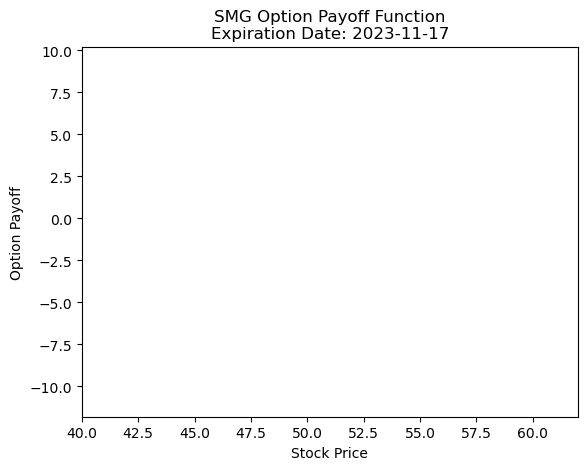

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Request user input for expiration date and stock ticker
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')

# Get the highest IV-HV divergence option contract from the option chain
option_chain = yf.Ticker(stock_ticker).option_chain(expiration_date)
highest_ivhv_contract = option_chain.calls.iloc[0]

# Calculate the strike price and option premium for the highest IV-HV divergence contract
strike_price = highest_ivhv_contract['strike']
option_premium = highest_ivhv_contract['lastPrice']

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
last_close_price = stock_info['Close'][0]
if last_close_price is None:
    print('Error: Could not retrieve last closing price for stock.')
    exit()

# Calculate the option payoff function for a range of stock prices
stock_price_range = range(int(0.8 * last_close_price), int(1.2 * last_close_price))
option_payoff = [max(stock_price - strike_price, 0) - option_premium for stock_price in stock_price_range]

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_price_range, 'Option Payoff': option_payoff})

# Set up the plotL
fig, ax = plt.subplots()
line, = ax.plot(df['Stock Price'], df['Option Payoff'])
chart_filename = f'{stock_ticker}_Option_Payoff.gif'
# Define the animation function
def animate(frame):
    # Update the plot data
    new_data = df.iloc[frame % len(df)]
    line.set_data(new_data['Stock Price'], new_data['Option Payoff'])
    
    # Set the plot title and axis labels
    ax.set_title(f'{stock_ticker} Option Payoff Function\nExpiration Date: {expiration_date}')
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')
    
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(df), interval=50, blit=True)
ani.save(chart_filename, writer='imagemagick')
# Show the plot
plt.show()


In [2]:
import yfinance as yf

msft = yf.Ticker("F")

# get all stock info (slow)
msft.info

HTTPError: 401 Client Error: Unauthorized for url: https://query1.finance.yahoo.com/v7/finance/quote?formatted=true&lang=en-US&symbols=F

In [3]:
print(msft.info("preMarketPrice"))

TypeError: 'dict' object is not callable